# Problem Statement

* About Dataset: The purpose of this dataset is to help us understand customer behavior and purchasing data in a supermarket mall through membership cards. The data includes basic information about customers such as their ID, age, gender, annual income, and spending score. Spending score is a parameter assigned to customers based on their purchasing behavior. The goal of this dataset is to use unsupervised ML techniques to segment the customers into groups and identify the target customers who are likely to converge. By understanding the customers better, the mall can plan their marketing strategy accordingly and increase their revenue. This dataset is designed for learning purposes and serves as an excellent example of how to use unsupervised machine learning algorithms in practice.
* Problem Statement and Objective The mall wants to understand the customer segments to better target marketing efforts and improve sales. The objective of this project is to identify distinct customer segments and provide recommendations to the marketing team to develop targeted marketing strategies.

# Assignment:

### Part1: Modeling, Hyperparameter Tuning & Evaluation
- Modeling for customer segmentation (use pycaret to experiment with multiple algorithms - K-Means, DB-Scan and Hierarchial Clustering)
- Select one of the best performing algorithms based on clustering model evaluation metrics. (Good to plot the datapoints in 3d and evaluate as well. Look for such plots in pycaret evaluate_method)
- Perform Hyperparameter Tuning for the shortlisted model
	- Use Grid Search
	- Use Random Search
	- Compare the evaluation metrics for the optimal combination of hyperparameter values from the Grid Search & Random Search.

### Part2: Model Explanation & Understanding
- Do the prediction on the training dataset for assigning clusters/labels to each row.
- Approach1 (Manual Analysis): Do the cluster/segment analysis
    - See the average mean of feature values for different clusters
    - Analyze it and try to give them the meaningful name (rather than cluster_0, cluster_1, we want to assign them a meaningful self explanatory name)
        - For example:
            - if Mean Age is 25, and Mean Income is 57k in cluster 1 , then the name can be "Young Moderate Income"
            - if Mean Age is 27 and Mean Income is 25k in cluster 2, then the name can be "Young Low Income"
- Approach2 (Using classification algorithm for model explaination): Train a classification model using the labelled data, that means you have to use the cluster labels as your Target variable now.
    - Once the classification model is trained, do the Global & Local explaination using SHAP & LIME libraries.
    - Put your observation for this
    - Think in terms of if the clustering labels are meaningful or not.
- Compare your understanding and observations from both the approaches and see if they are inline.
    - Goal here is to re-validate the model and establish a trust.

- Finalize model: Train the selected algorithm over the entire dataset (TRAIN + TEST) using the optimal hyperparameter values.
- Export the model file in the pickle format and save it in a "./model" directory. (use proper naming and version)

NOTE: Dataset is small and simple, Focus should be on trying out different techniques and get your hands dirty.

# Write-up
* Explain in detail your observations, outcomes and why you have taken a certain approach over the other.

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 890.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [2]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.4 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=df0021533329f657db12f6d9a867ee467f856d7c39428c8a1e5548bf7ef84ef2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# **Part1: Modeling, Hyperparameter Tuning & Evaluation**

In [3]:
import pandas as pd
df = pd.read_csv("/content/mall_customers.csv")
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.clustering import *
import shap
import lime
import pickle


In [5]:
print(df.shape)

(200, 5)


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# Drop CustomerID as it's not needed for clustering
df = df.drop('CustomerID', axis=1)
df

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]

In [9]:
# Encode Gender as a numeric variable
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74
198       0   32                 137                      18
199       0   30                 137                      83

[200 rows x 4 columns]

In [10]:
df

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74
198       0   32                 137                      18
199       0   30                 137                      83

[200 rows x 4 columns]

In [11]:
from pycaret.clustering import *


In [12]:
exp_clu101 = setup(df, session_id = 123)

In [13]:
# Train models
kmeans_model = create_model('kmeans',num_clusters=6)
dbscan_model = create_model('dbscan')
hc_model = create_model('hclust',num_clusters=5)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
# Evaluate models
evaluate_model(kmeans_model)
evaluate_model(dbscan_model)
evaluate_model(hc_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
kmeans_model

KMeans(n_clusters=6, random_state=123)

In [16]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import silhouette_score

In [17]:
# Define the parameter grid
param_grid = {
    'n_clusters': [2,3,4,5,6,7,8,9,10],
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300],
    'algorithm': ['lloyd', 'elkan'],
}

# Create the KMeans object
kmeans = KMeans(random_state=123)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1,verbose=3)

# Fit the grid search to the data
grid_search.fit(df)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'random', 'max_iter': 100, 'n_clusters': 10, 'n_init': 15}
Optimal number of clusters based on parameter grid: 10


In [18]:
best_model = grid_search.best_estimator_
best_model

KMeans(init='random', max_iter=100, n_clusters=10, n_init=15, random_state=123)

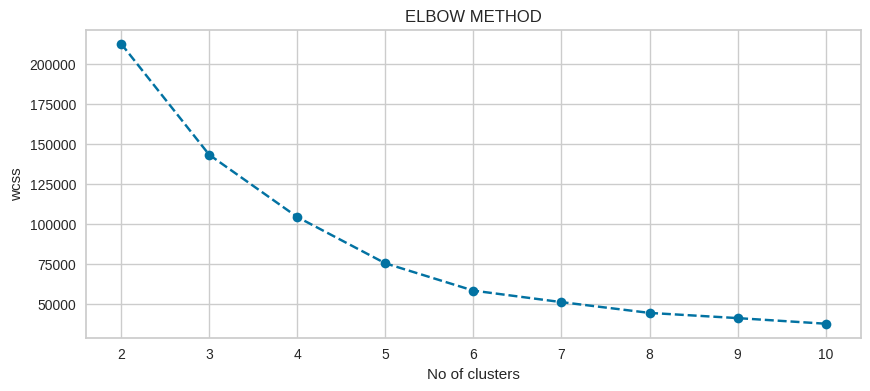

In [19]:
wcss=[]
for i in range(2,11):
  kmeans=KMeans(algorithm ='lloyd', init= 'random', max_iter= 100, n_clusters= i, n_init= 15)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,11),wcss,ls='--',marker='o',color='b')
plt.title('ELBOW METHOD')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

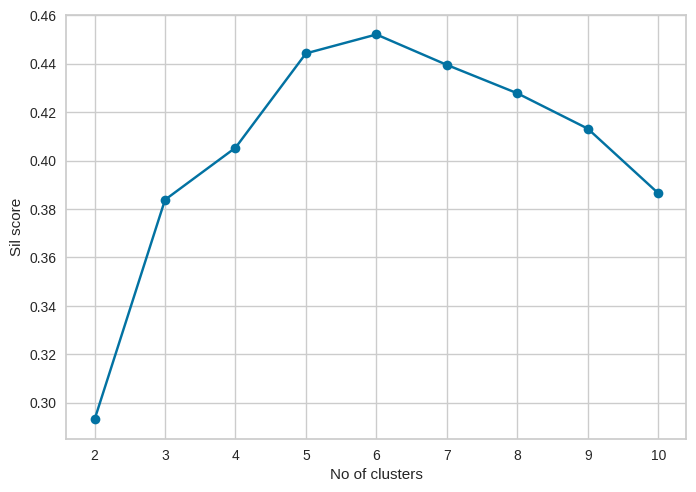

In [20]:
sil=[]
for i in range(2,11):
  model=KMeans(algorithm ='lloyd', init= 'random', max_iter= 100, n_clusters= i, n_init= 15)
  model.fit(df)
  sil.append(silhouette_score(df,model.labels_))
plt.plot(range(2,11),sil,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('Sil score')
plt.show()

- Silhouette score is highest for n_clusters=6

In [21]:
best_model_from_grid_search=KMeans(n_clusters= 6  ,algorithm ='lloyd', init= 'random', max_iter= 100,  n_init= 15)
best_model_from_grid_search.fit(df)

KMeans(init='random', max_iter=100, n_clusters=6, n_init=15)

In [22]:
silhouette_score(df,best_model_from_grid_search.labels_)

0.45205475380756527

In [23]:
# Define the parameter grid
param_distribution = {
    'n_clusters': [2,3,4,5,6,7,8,9,10],
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300],
    'algorithm': ['lloyd', 'elkan'],
}

# Create the KMeans object
kmeans = KMeans(random_state=123)

# Perform grid search
random_search = RandomizedSearchCV(kmeans, param_distributions=param_distribution, cv=5, n_jobs=-1,verbose=3)

# Fit the grid search to the data
random_search.fit(df)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(random_search.best_params_['n_clusters']))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters:  {'n_init': 15, 'n_clusters': 8, 'max_iter': 300, 'init': 'random', 'algorithm': 'elkan'}
Optimal number of clusters based on parameter grid: 8


In [24]:
best_model_random = random_search.best_estimator_
best_model_random

KMeans(algorithm='elkan', init='random', n_init=15, random_state=123)

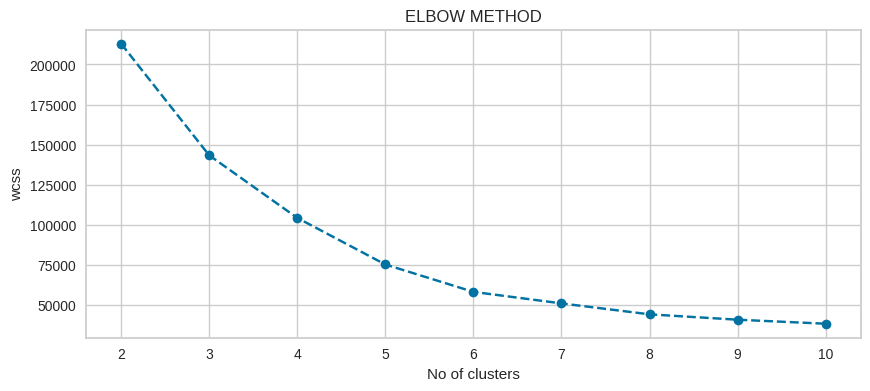

In [25]:
wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_init= 15, n_clusters= i, max_iter= 300, init= 'random', algorithm= 'elkan')
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,11),wcss,ls='--',marker='o',color='b')
plt.title('ELBOW METHOD')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

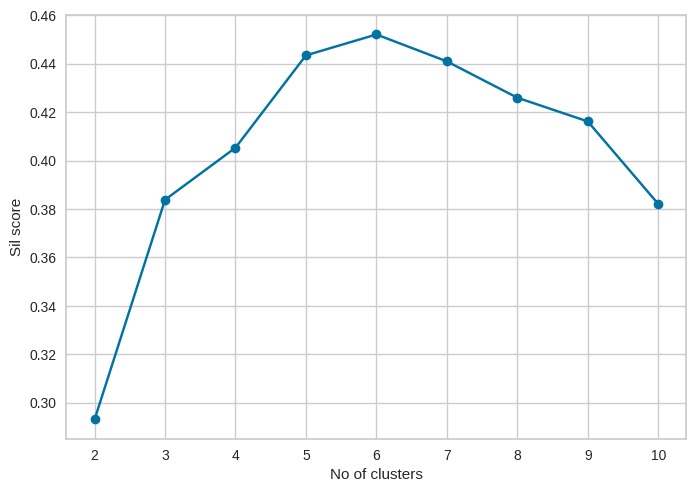

In [26]:
sil=[]
for i in range(2,11):
  model=KMeans(n_init= 15, n_clusters= i, max_iter= 300, init= 'random', algorithm= 'elkan')
  model.fit(df)
  sil.append(silhouette_score(df,model.labels_))
plt.plot(range(2,11),sil,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('Sil score')
plt.show()

- Silhouette score is highest for n_clusters=6

In [27]:
best_model_from_random_search=KMeans(n_init= 15, n_clusters= 6, max_iter= 300, init= 'random', algorithm= 'elkan')
best_model_from_random_search.fit(df)

KMeans(algorithm='elkan', init='random', n_clusters=6, n_init=15)

In [28]:
silhouette_score(df,best_model_from_random_search.labels_)

0.45205475380756527

In [29]:
plot_model(best_model_from_grid_search, plot='tsne')

- From the above 3D representation, we can visually see the clustering has done a good job

- Both grid and random search gives similar results
- we can take best_model_from_grid_search as best model

# **Part2: Model Explanation & Understanding**

In [30]:
cluster_df = assign_model(best_model_from_grid_search)
cluster_df

Gender  Age  Annual Income (k$)  Spending Score (1-100)    Cluster
0         0   19                  15                      39  Cluster 4
1         0   21                  15                      81  Cluster 1
2         1   20                  16                       6  Cluster 4
3         1   23                  16                      77  Cluster 1
4         1   31                  17                      40  Cluster 4
..      ...  ...                 ...                     ...        ...
195       1   35                 120                      79  Cluster 5
196       1   45                 126                      28  Cluster 3
197       0   32                 126                      74  Cluster 5
198       0   32                 137                      18  Cluster 3
199       0   30                 137                      83  Cluster 5

[200 rows x 5 columns]

In [31]:
cluster_df.drop('Gender',axis=1).groupby('Cluster').mean()

Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                         
Cluster 0  56.155556           53.377778               49.088889
Cluster 1  25.272727           25.727273               79.363636
Cluster 2  27.000000           56.657895               49.131579
Cluster 3  41.685714           88.228571               17.285714
Cluster 4  44.142857           25.142857               19.523810
Cluster 5  32.692308           86.538462               82.128205

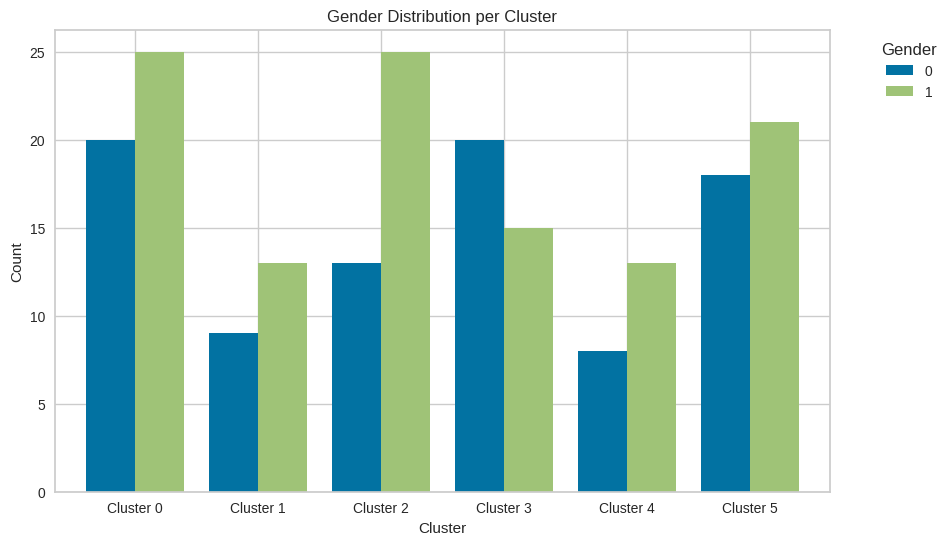

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Get the gender distribution as a DataFrame
gender_distribution = cluster_df.groupby('Cluster')['Gender'].value_counts().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
gender_distribution.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Gender Distribution per Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

In [33]:
name_mapping = {
    'Cluster 0': "Older Moderate Income Balanced Spender",
    'Cluster 1': "Young Low Income High Spender",
    'Cluster 2': "Young Moderate Income Balanced Spender",
    'Cluster 3': "Middle-aged High Income Low Spender",
    'Cluster 4': "Middle-aged Low Income Low Spender",
    'Cluster 5': "Young High Income High Spender"
}


In [34]:
# Create a new column 'Meaningful Name' by mapping the values in the 'Cluster' column
cluster_df['Meaningful Name'] = cluster_df['Cluster'].replace(name_mapping)

# Display the updated DataFrame
cluster_df

Gender  Age  Annual Income (k$)  Spending Score (1-100)    Cluster  \
0         0   19                  15                      39  Cluster 4   
1         0   21                  15                      81  Cluster 1   
2         1   20                  16                       6  Cluster 4   
3         1   23                  16                      77  Cluster 1   
4         1   31                  17                      40  Cluster 4   
..      ...  ...                 ...                     ...        ...   
195       1   35                 120                      79  Cluster 5   
196       1   45                 126                      28  Cluster 3   
197       0   32                 126                      74  Cluster 5   
198       0   32                 137                      18  Cluster 3   
199       0   30                 137                      83  Cluster 5   

                         Meaningful Name  
0     Middle-aged Low Income Low Spender  
1          Young Low Income High Spender  
2     Middle-aged Low Income Low Spender  
3          Young Low Income High Spender  
4     Middle-aged Low Income Low Spender  
..                                   ...  
195       Young High Income High Spender  
196  Middle-aged High Income Low Spender  
197       Young High Income High Spender  
198  Middle-aged High Income Low Spender  
199       Young High Income High Spender  

[200 rows x 6 columns]

In [35]:
cluster_df['Meaningful Name'].value_counts()

Meaningful Name
Older Moderate Income Balanced Spender    45
Young High Income High Spender            39
Young Moderate Income Balanced Spender    38
Middle-aged High Income Low Spender       35
Young Low Income High Spender             22
Middle-aged Low Income Low Spender        21
Name: count, dtype: int64

In [36]:
cluster_df.drop(['Gender','Cluster'],axis=1).groupby('Meaningful Name').mean()

Age  Annual Income (k$)  \
Meaningful Name                                                         
Middle-aged High Income Low Spender     41.685714           88.228571   
Middle-aged Low Income Low Spender      44.142857           25.142857   
Older Moderate Income Balanced Spender  56.155556           53.377778   
Young High Income High Spender          32.692308           86.538462   
Young Low Income High Spender           25.272727           25.727273   
Young Moderate Income Balanced Spender  27.000000           56.657895   

                                        Spending Score (1-100)  
Meaningful Name                                                 
Middle-aged High Income Low Spender                  17.285714  
Middle-aged Low Income Low Spender                   19.523810  
Older Moderate Income Balanced Spender               49.088889  
Young High Income High Spender                       82.128205  
Young Low Income High Spender                        79.363636  
Young Moderate Income Balanced Spender               49.131579

In [37]:
import shap
import lime

In [38]:
label_encoding = {
    'Cluster 0': 0,
    'Cluster 1': 1,
    'Cluster 2': 2,
    'Cluster 3': 3,
    'Cluster 4': 4,
    'Cluster 5': 5
}

In [39]:
cluster_df['Target'] = cluster_df['Cluster'].replace(label_encoding)

# Display the updated DataFrame
cluster_df

Gender  Age  Annual Income (k$)  Spending Score (1-100)    Cluster  \
0         0   19                  15                      39  Cluster 4   
1         0   21                  15                      81  Cluster 1   
2         1   20                  16                       6  Cluster 4   
3         1   23                  16                      77  Cluster 1   
4         1   31                  17                      40  Cluster 4   
..      ...  ...                 ...                     ...        ...   
195       1   35                 120                      79  Cluster 5   
196       1   45                 126                      28  Cluster 3   
197       0   32                 126                      74  Cluster 5   
198       0   32                 137                      18  Cluster 3   
199       0   30                 137                      83  Cluster 5   

                         Meaningful Name  Target  
0     Middle-aged Low Income Low Spender       4  
1          Young Low Income High Spender       1  
2     Middle-aged Low Income Low Spender       4  
3          Young Low Income High Spender       1  
4     Middle-aged Low Income Low Spender       4  
..                                   ...     ...  
195       Young High Income High Spender       5  
196  Middle-aged High Income Low Spender       3  
197       Young High Income High Spender       5  
198  Middle-aged High Income Low Spender       3  
199       Young High Income High Spender       5  

[200 rows x 7 columns]

In [40]:
cluster_df['Target'].value_counts()

Target
0    45
5    39
2    38
3    35
1    22
4    21
Name: count, dtype: int64

In [41]:
cluster_df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Cluster', 'Meaningful Name', 'Target'],
      dtype='object')

In [42]:
exp_df=cluster_df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Target']]
exp_df

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Target
0         0   19                  15                      39       4
1         0   21                  15                      81       1
2         1   20                  16                       6       4
3         1   23                  16                      77       1
4         1   31                  17                      40       4
..      ...  ...                 ...                     ...     ...
195       1   35                 120                      79       5
196       1   45                 126                      28       3
197       0   32                 126                      74       5
198       0   32                 137                      18       3
199       0   30                 137                      83       5

[200 rows x 5 columns]

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(exp_df.drop('Target',axis=1),exp_df['Target'], test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
random_forest_preds = model.predict(X_test)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,y_test))

The accuracy of the Random Forests model is :	 0.925


# Lime local Explainer

In [45]:
# importing lime
import lime
from lime import lime_tabular

In [46]:
class_names=exp_df['Target'].unique()
class_names.sort()
class_names

array([0, 1, 2, 3, 4, 5])

In [88]:
X_train.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [89]:
#Lets give column name as below for better interpretability using LIME
['a','b','c','d']

['a', 'b', 'c', 'd']

- [  'a'  ,  'b'  ,  'c'  ,  'd'  ] corresponds to [ 'Gender'
 ,  'Age'  ,  'Annual Income (k$)'  ,  'Spending Score (1-100)'  ]

In [90]:
# creating an instance of the lime tabular explainer
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), feature_names=['a','b','c','d'], class_names=class_names, mode='classification')

In [91]:
X_test.shape

(40, 4)

In [92]:
instance_to_explain = X_test.iloc[1]
instance_to_explain

Gender                     0
Age                       22
Annual Income (k$)        20
Spending Score (1-100)    79
Name: 15, dtype: int32

In [93]:
explanation = lime_explainer.explain_instance(
    data_row=instance_to_explain,      # Instance to explain
    predict_fn=model.predict_proba,    # Model's predict_proba function
    top_labels=6,                     # Number of top labels to show
    num_features=4                    # Number of features to include in the explanation (or fewer if needed)
)

In [94]:
explanation.show_in_notebook()

-   **LIME Explaination**
- [  'a'  ,  'b'  ,  'c'  ,  'd'  ] corresponds to [ 'Gender'
 ,  'Age'  ,  'Annual Income (k$)'  ,  'Spending Score (1-100)'  ]
- We can see how the differenct values of the features contributed to the prediction
- the model predicts class 1 with 100% probability
- The values of all different features are said to be in the the range that meets the threshold for class 1

In [95]:
instance_to_explain = X_test.iloc[10]
instance_to_explain

Gender                     1
Age                       43
Annual Income (k$)        48
Spending Score (1-100)    50
Name: 66, dtype: int32

In [96]:
explanation = lime_explainer.explain_instance(
    data_row=instance_to_explain,      # Instance to explain
    predict_fn=model.predict_proba,    # Model's predict_proba function
    top_labels=6,                     # Number of top labels to show
    num_features=4                    # Number of features to include in the explanation (or fewer if needed)
)

In [97]:
explanation.show_in_notebook()

-   **LIME Explaination**
- [  'a'  ,  'b'  ,  'c'  ,  'd'  ] corresponds to [ 'Gender'
 ,  'Age'  ,  'Annual Income (k$)'  ,  'Spending Score (1-100)'  ]
- the model predicts class 2 with 81% probability
- class 2 is "Young Moderate Income Balanced Spender"
- The age column meets the criteria of NOT 2 since age is 43. This clearly visible in the NOT 2 section of the above plot.
- We can see how the different features threshold contributed to the prediction of class 2: Annual income and Spending score contributed mostly to the prediction to class 2
- If age was a bit high the prediction would hve been class 0 ("Older Moderate Income Balanced Spender") so class 0 has a predicted probability of 14%

# Shap explainer

In [55]:
import shap

In [56]:
# Calculate SHAP values
explainer = shap.TreeExplainer(model )
shap_values = explainer.shap_values(X_test)

In [57]:
shap_values.shape

(40, 4, 6)

# Global interpretation

# Summary plot for class 0

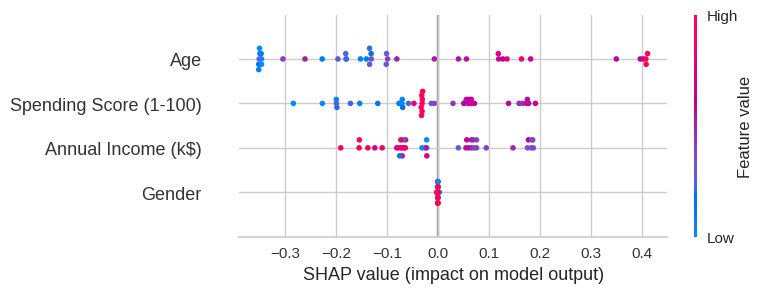

In [58]:
# Extract SHAP values for class 0 (change 0 to the index of the class you're interested in)
shap_values_class_0 = shap_values[:, :, 0]  # Shape: (1000, 10)
shap_values_class_0.shape
# Plot the summary plot for class 0
shap.summary_plot(shap_values_class_0, X_test)

# Summary plot for all the classes

Summary plot for class 0


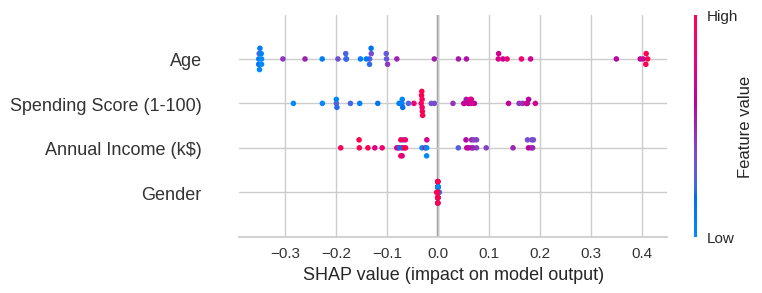

Summary plot for class 1


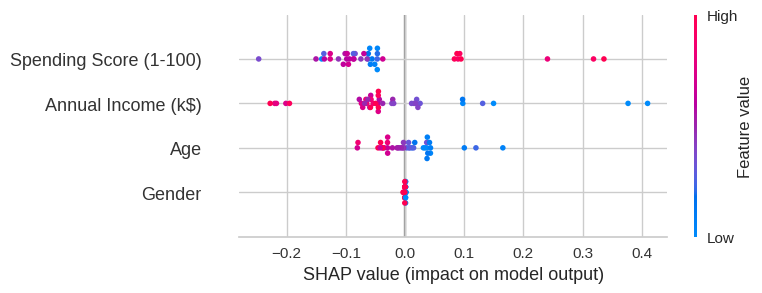

Summary plot for class 2


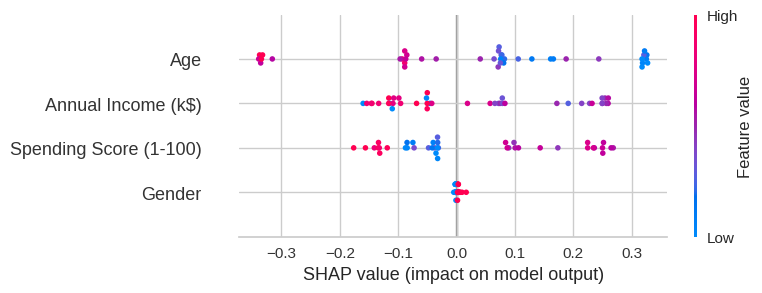

Summary plot for class 3


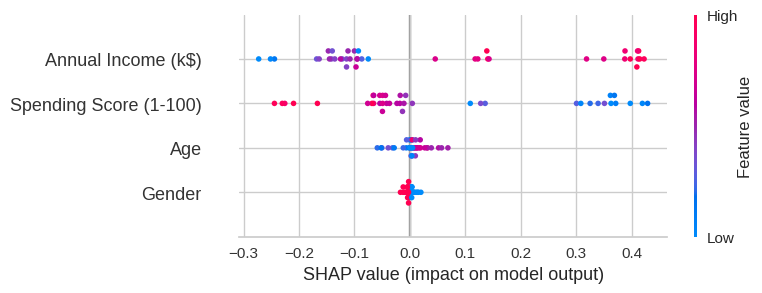

Summary plot for class 4


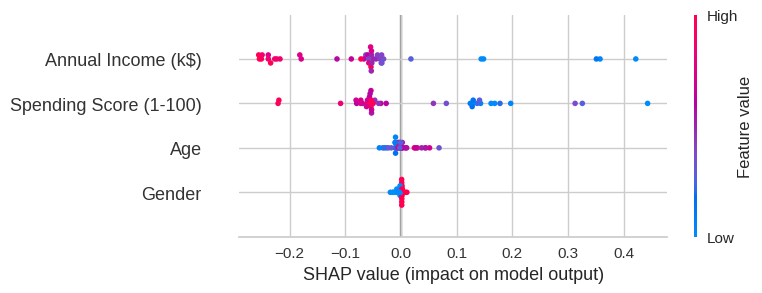

Summary plot for class 5


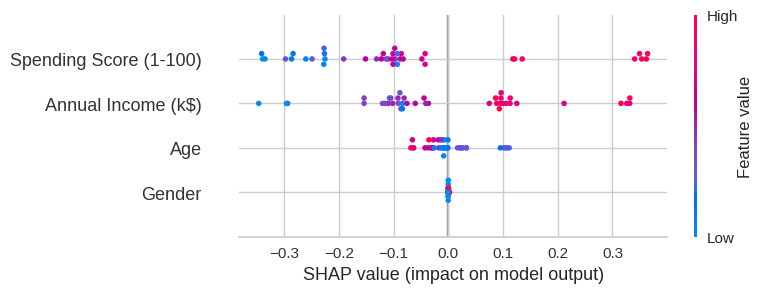

In [59]:
for class_idx in range(y_train.nunique()):  # plotting individually for each classes
    shap_values_class = shap_values[:, :, class_idx]
    print(f"Summary plot for class {class_idx}")
    shap.summary_plot(shap_values_class, X_test)


Summary plot for class 0


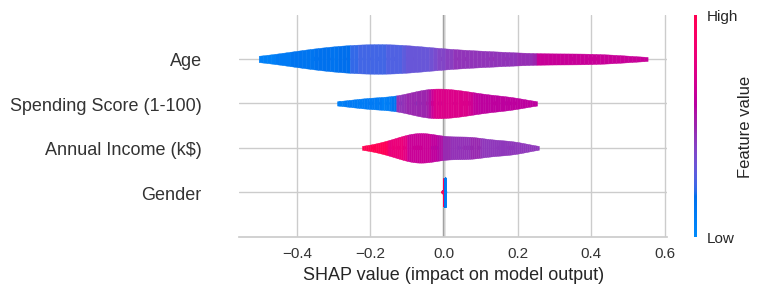

Summary plot for class 1


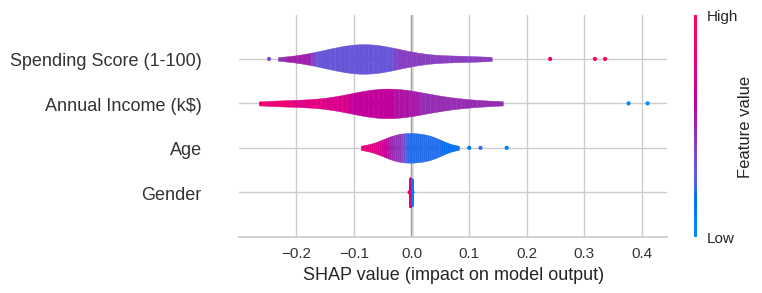

Summary plot for class 2


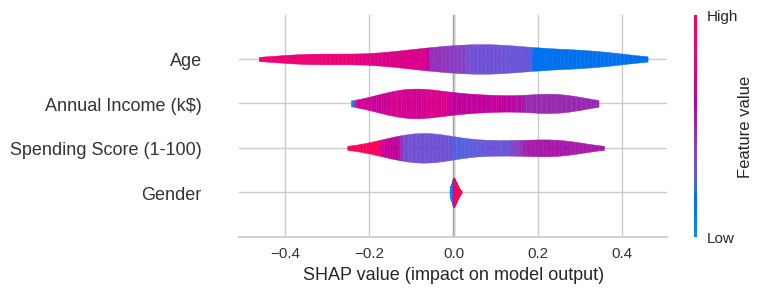

Summary plot for class 3


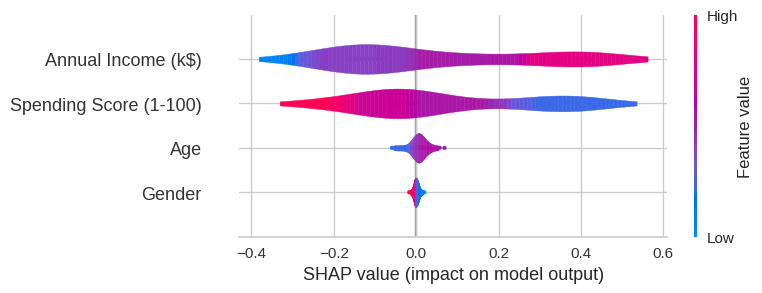

Summary plot for class 4


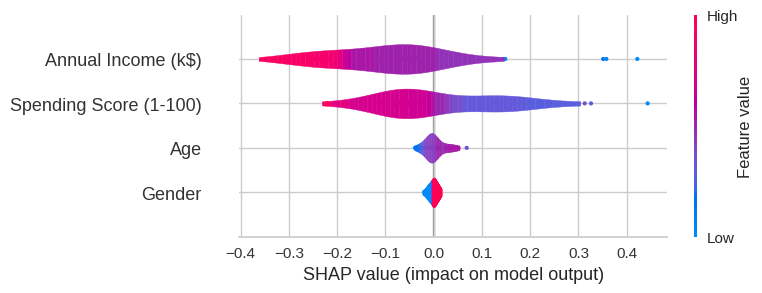

Summary plot for class 5


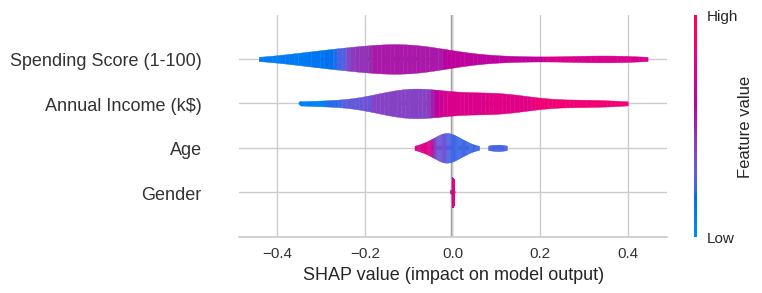

In [60]:
# Plotting the above using violin plot for better interpretability
for class_idx in range(y_train.nunique()):  # plotting individually for each classes
    shap_values_class = shap_values[:, :, class_idx]
    print(f"Summary plot for class {class_idx}")
    shap.summary_plot(shap_values_class, X_test,plot_type='violin')


# **Understanding of shap summary and comparison of both approaches**

- We can see for different classes how high and low values of a feature can impact the shap value and model impact on target
- **'Cluster 0': "Older Moderate Income Balanced Spender"**

  **'Cluster 1': "Young Low Income High Spender"**
    
    **'Cluster 2': "Young Moderate Income Balanced Spender"**

    **'Cluster 3': "Middle-aged High Income Low Spender"**

    **'Cluster 4': "Middle-aged Low Income Low Spender"**

    **'Cluster 5': "Young High Income High Spender"**


## **Understanding from summary plot**    
- **Plot for class 0:** we can see if age is high , income and spending score is medium will predict class 0. If age is low it will result in not class 0.

- **Plot for class 1:** If spending score is high , annual income is low, age is low , will predict class 1. If spending score is low, annual income is high, age is high , it will result in not class 1.

- **Plot for class 2:** If age is low , annual income and spending score is medium will result to predict class 2.If age is high will result in not class 2.
- **Plot for class 3:** If annual income is high, spending score is low, age is medium, will predict class 3. If annual income is low, spending score is high will result in not class 3.

- **Plot for class 4:** If annual income is low , spending score is low and age is medium, will predict class 4. If annual income is high and spending score is high will result in not class 4.

- **Plot for class 5:** Spending score is high, annual income is high and age is low, will predict class 5. If spending score is low annual income is low and age is high will predict not class 5.

## **By Comparing the understanding of the summary plot using shap and the actual clusters, We can see the Clustering algorithm has done a good job in clustering the Dataset**

# Taking averge of shap_values across all classes

In [61]:
# Average SHAP values across the class axis
shap_values_mean = shap_values.mean(axis=-1)  # Shape: (1000, 10)

# Plot of averaged SHAP values- global interpretation

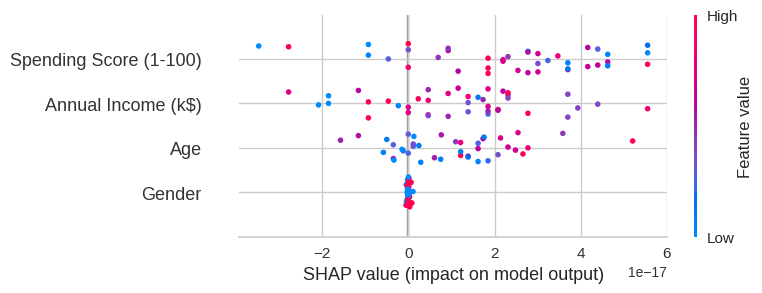

In [62]:
# Plot the averaged SHAP values- global interpretation
shap.summary_plot(shap_values_mean, X_test)

# Bar summary plot for average shap values

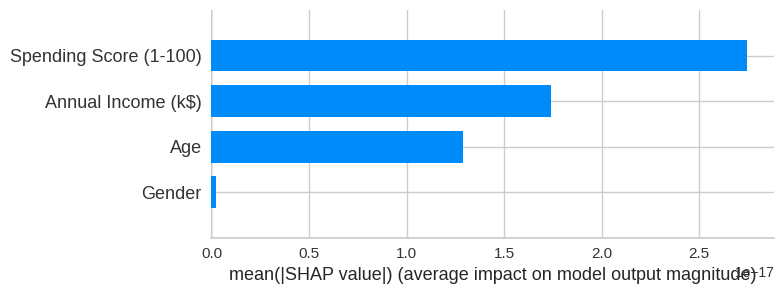

In [63]:
#Global interpretation
shap.summary_plot(shap_values_mean, X_test, plot_type="bar")  # Averaged across classes

- In terms of global explaination, we can clearly see that spending score, annual income and age are the most important functions for predicting the cluster/target.
- Spending score has the highest score followed by annual income
- With these observations we can see that the clustering model has performed a pretty good job.
- Gender has the least impact on the Target

In [64]:
y_train.nunique()

6

# Bar summary plot for each classes

Summary plot for class 0


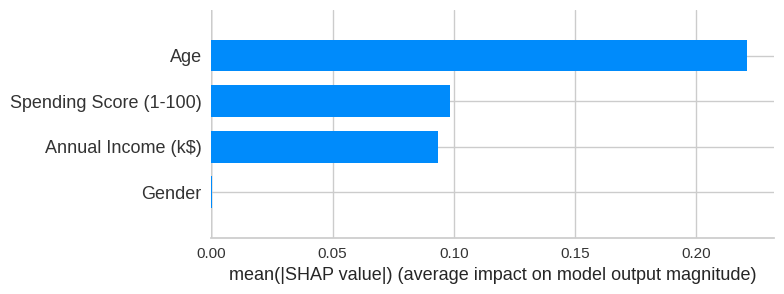

Summary plot for class 1


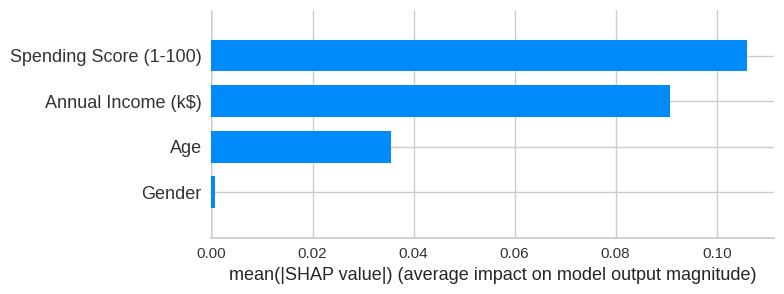

Summary plot for class 2


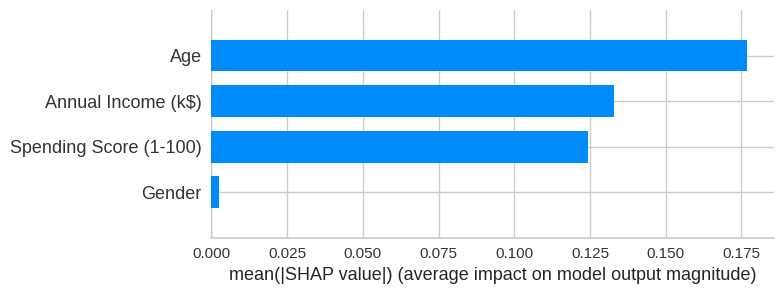

Summary plot for class 3


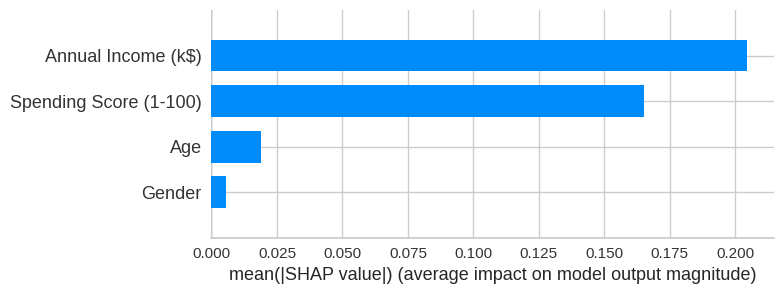

Summary plot for class 4


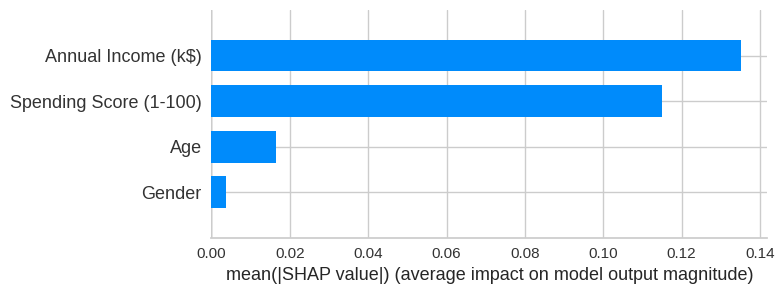

Summary plot for class 5


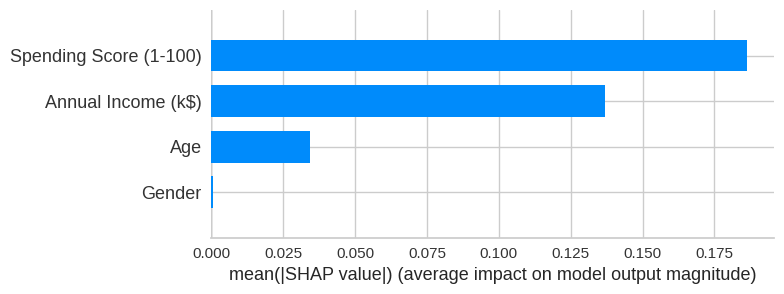

In [65]:
for class_idx in range(y_train.nunique()):  # plotting individually for each classes
    shap_values_class = shap_values[:, :, class_idx]
    print(f"Summary plot for class {class_idx}")
    shap.summary_plot(shap_values_class, X_test,plot_type="bar")


- We can see in the feature importance of each individual class also pending score, annual income and age are the most important functions for predicting the cluster/target.

# Dependence plot for each features using mean shap

dependence plot for feature Gender using shap value mean


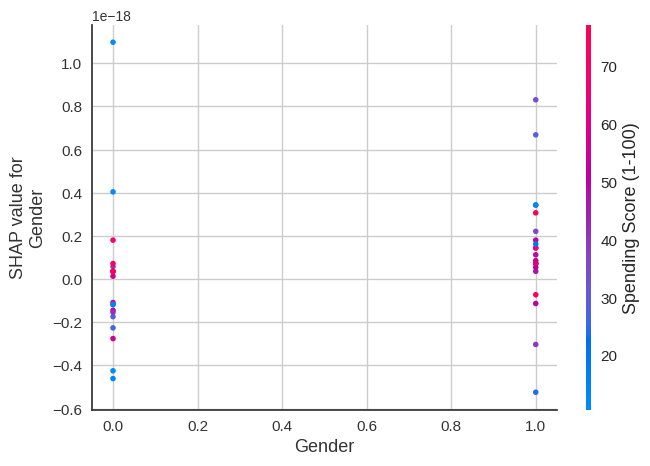

dependence plot for feature Age using shap value mean


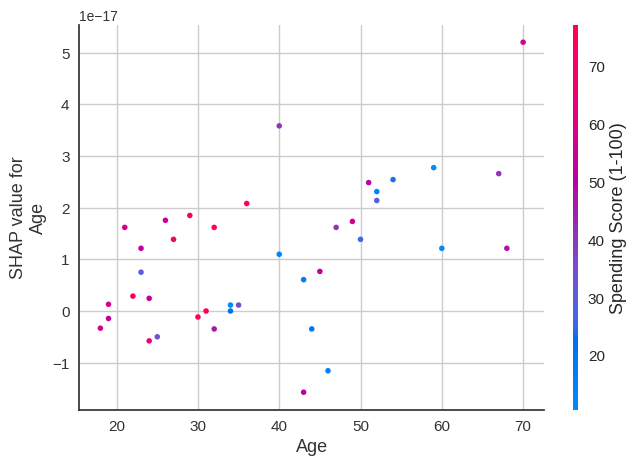

dependence plot for feature Annual Income (k$) using shap value mean


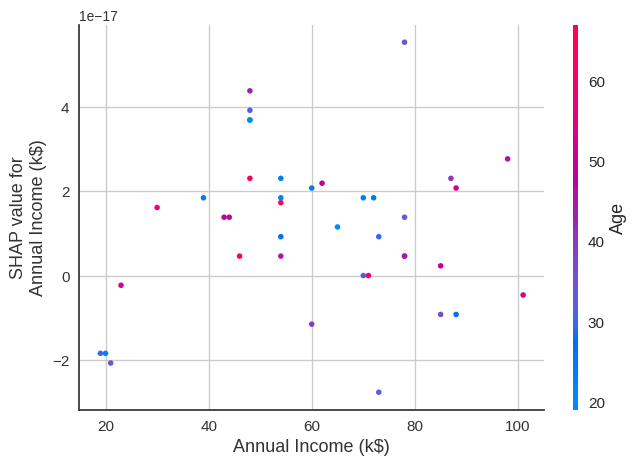

dependence plot for feature Spending Score (1-100) using shap value mean


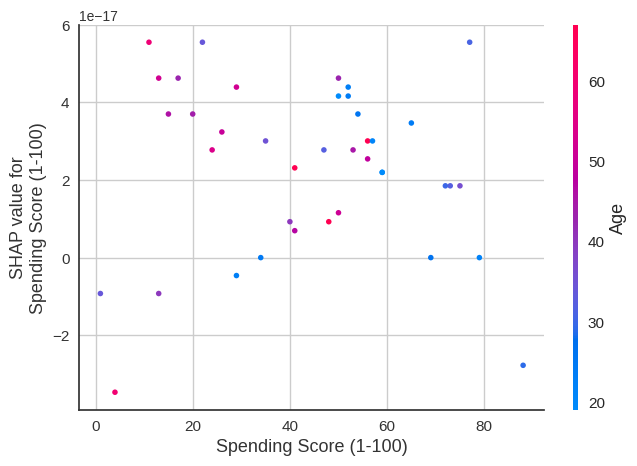

In [66]:
for i in X_test.columns:
  print(f"dependence plot for feature {i} using shap value mean")
  shap.dependence_plot(i, shap_values_mean, X_test)

- We can see from dependence plot as age increases that shap values also increases to an extend
- Annual income and spending score vs mean shap values give a mixed results because it changes for different classes

# dependence plot for class 0 and feature age

# Dependence plot for each class against all features

Dependence plot for feature:Gender in class:0


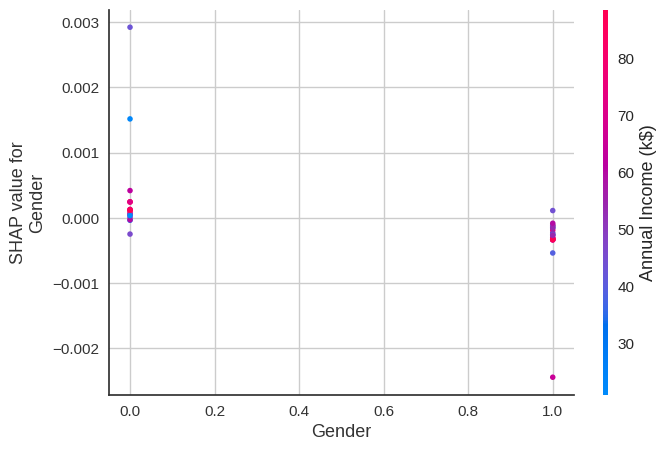

Dependence plot for feature:Age in class:0


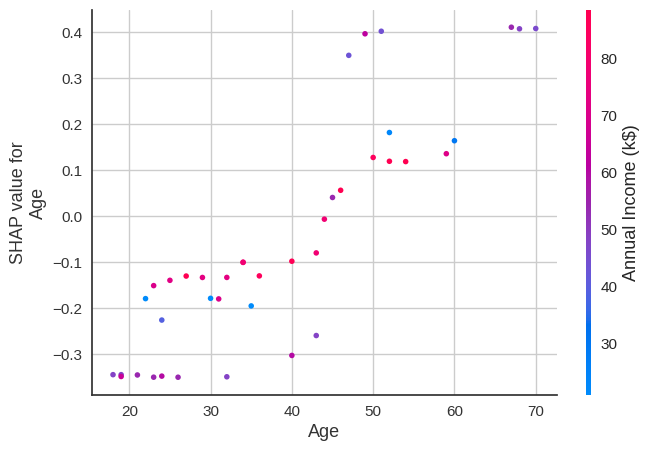

Dependence plot for feature:Annual Income (k$) in class:0


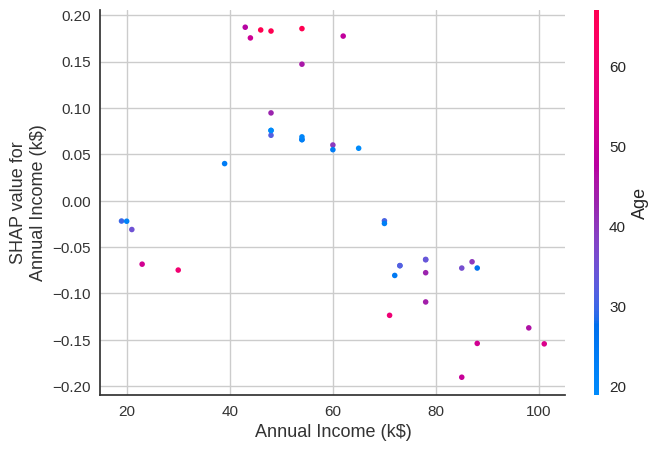

Dependence plot for feature:Spending Score (1-100) in class:0


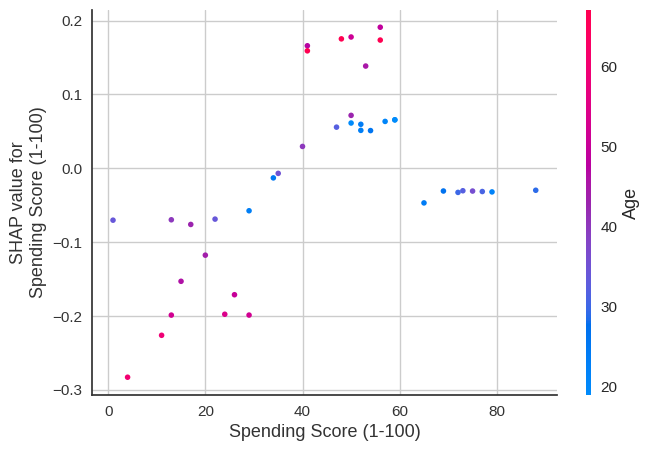

Dependence plot for feature:Gender in class:1


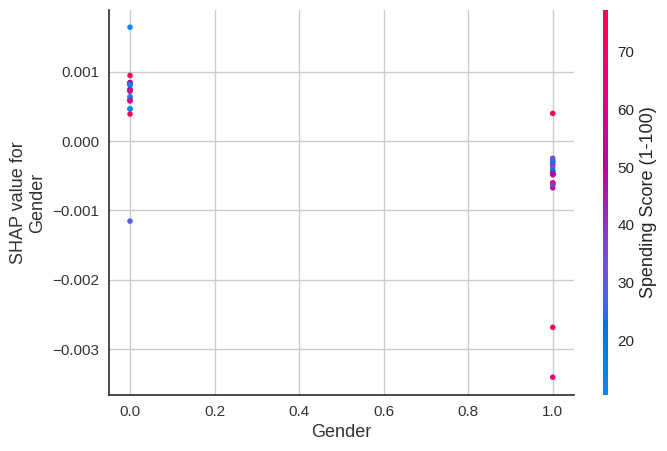

Dependence plot for feature:Age in class:1


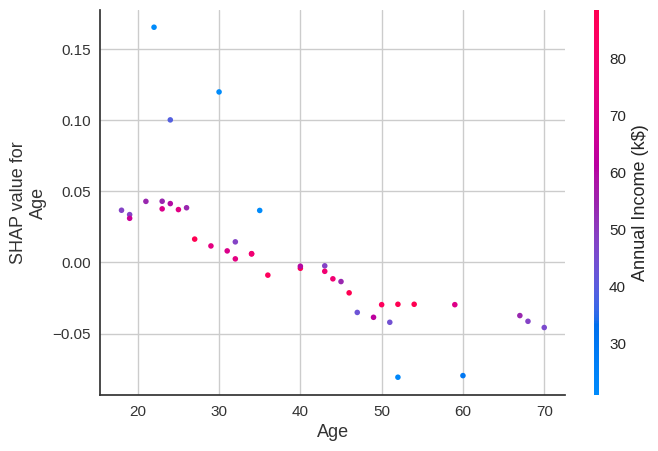

Dependence plot for feature:Annual Income (k$) in class:1


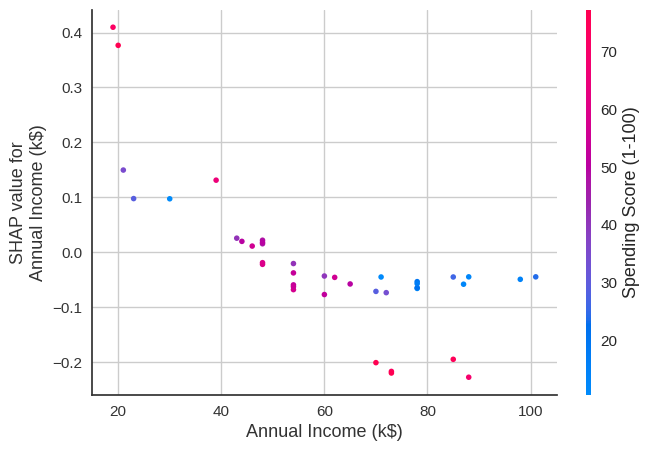

Dependence plot for feature:Spending Score (1-100) in class:1


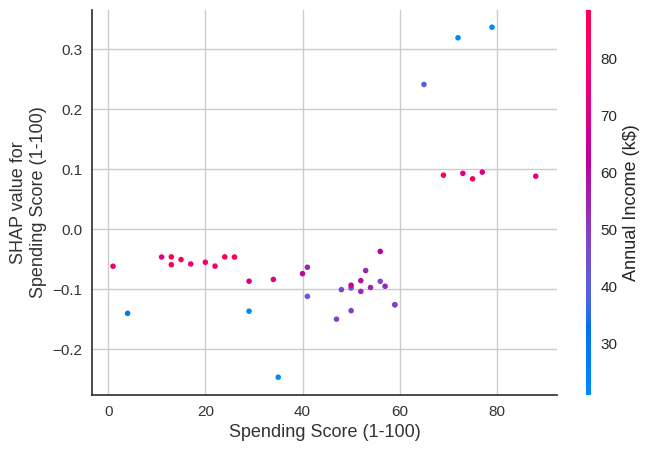

Dependence plot for feature:Gender in class:2


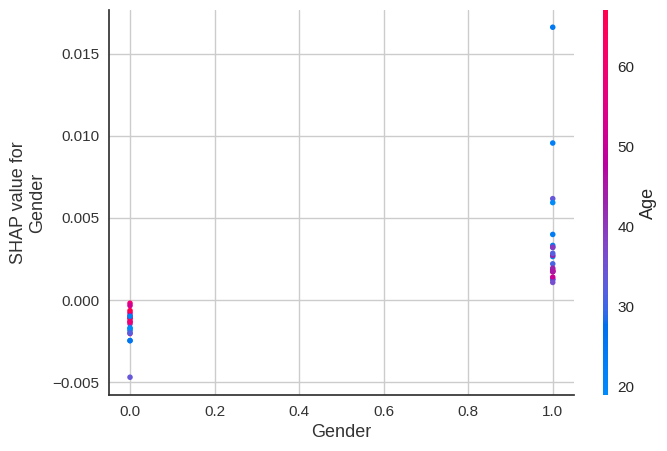

Dependence plot for feature:Age in class:2


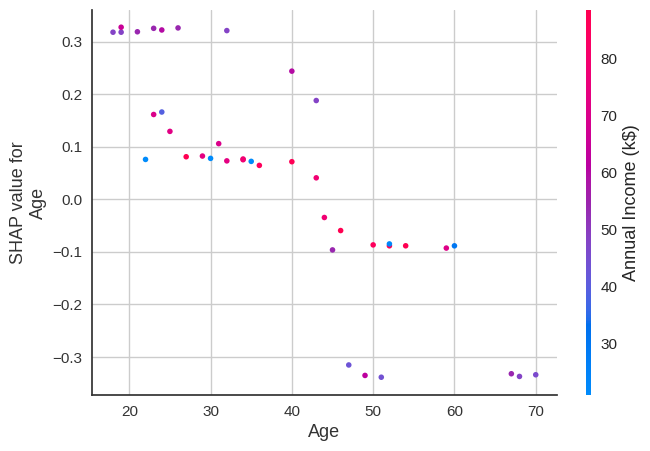

Dependence plot for feature:Annual Income (k$) in class:2


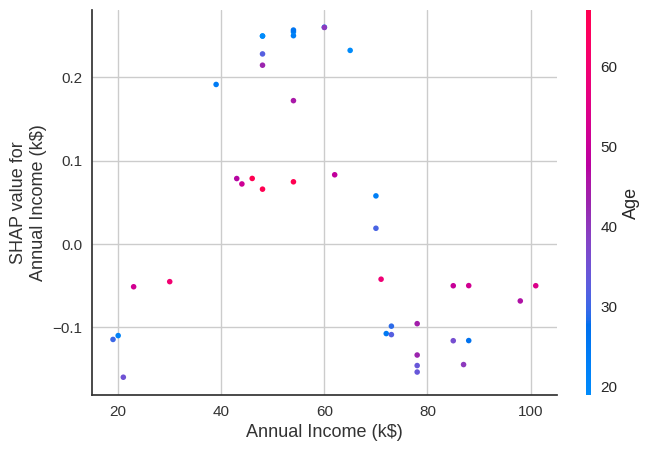

Dependence plot for feature:Spending Score (1-100) in class:2


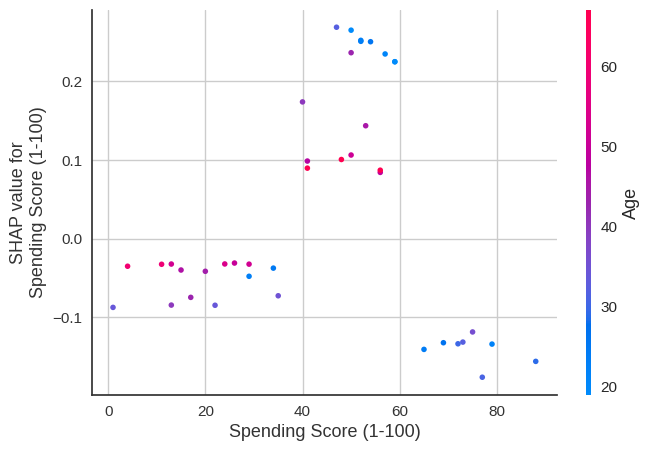

Dependence plot for feature:Gender in class:3


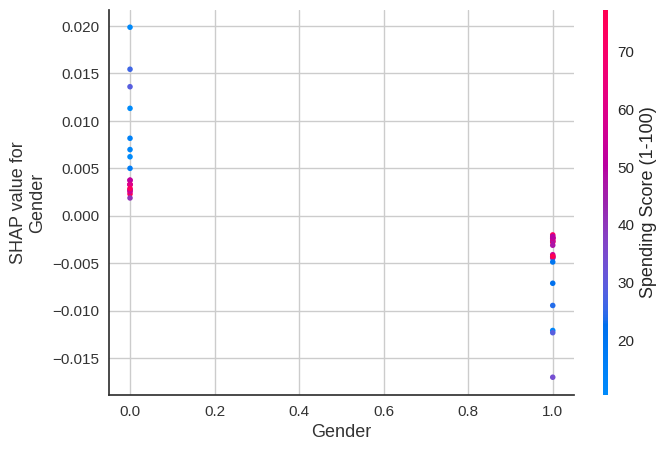

Dependence plot for feature:Age in class:3


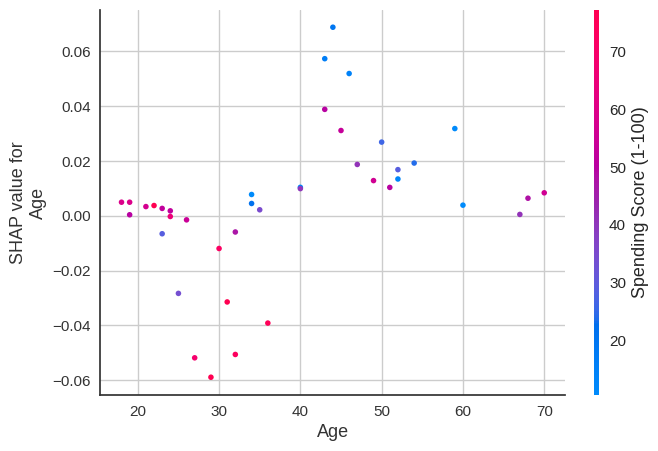

Dependence plot for feature:Annual Income (k$) in class:3


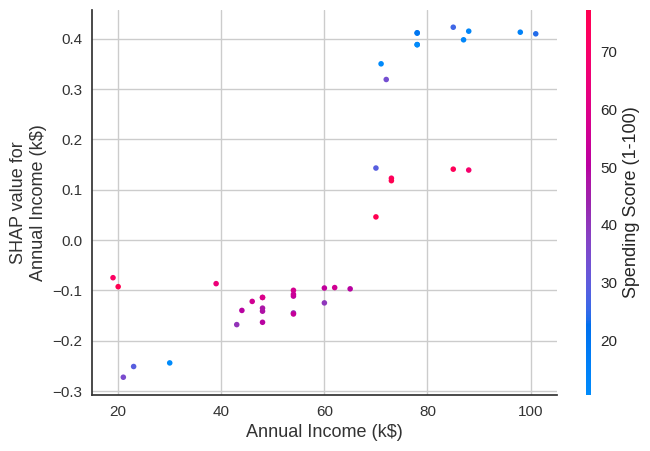

Dependence plot for feature:Spending Score (1-100) in class:3


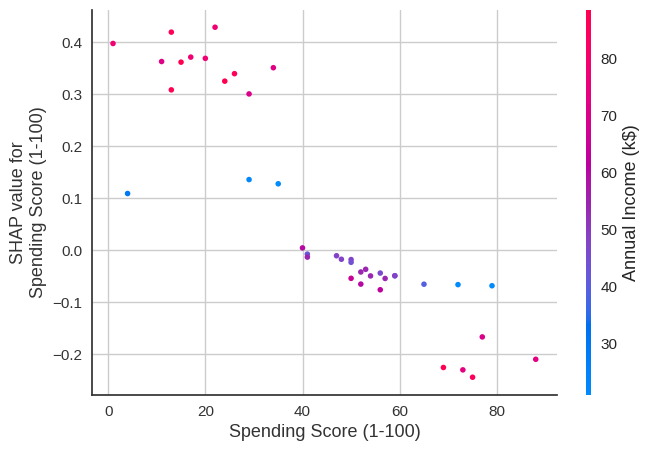

Dependence plot for feature:Gender in class:4


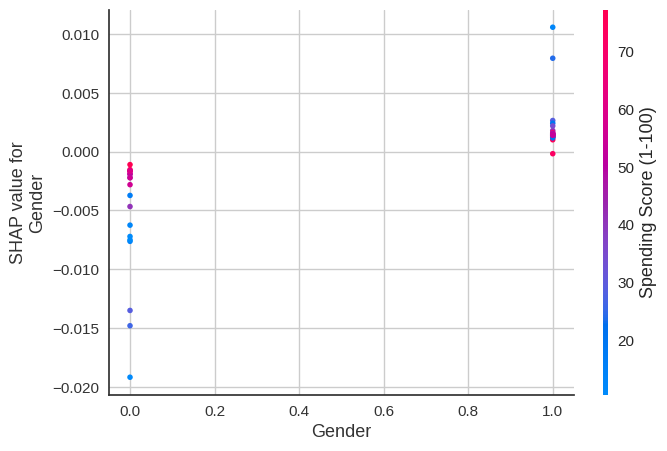

Dependence plot for feature:Age in class:4


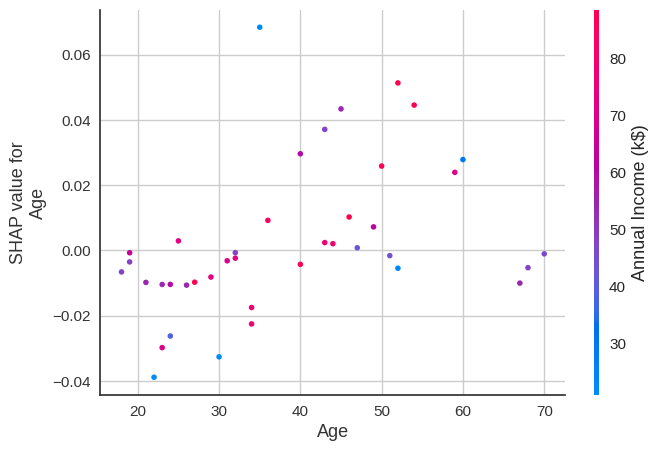

Dependence plot for feature:Annual Income (k$) in class:4


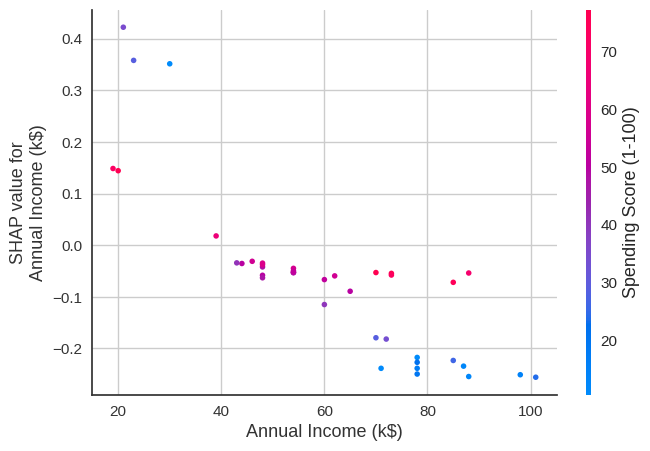

Dependence plot for feature:Spending Score (1-100) in class:4


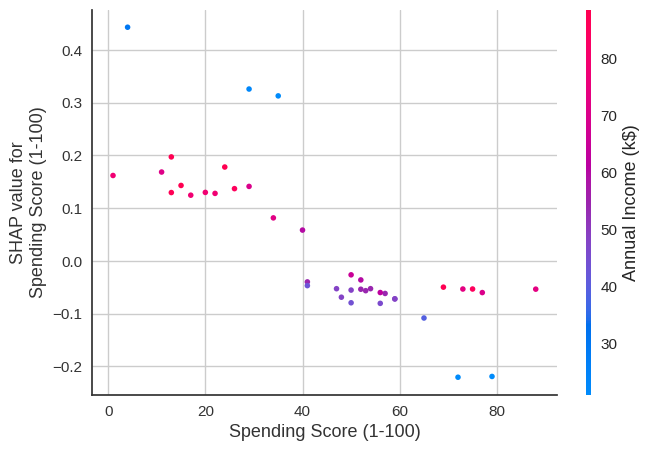

Dependence plot for feature:Gender in class:5


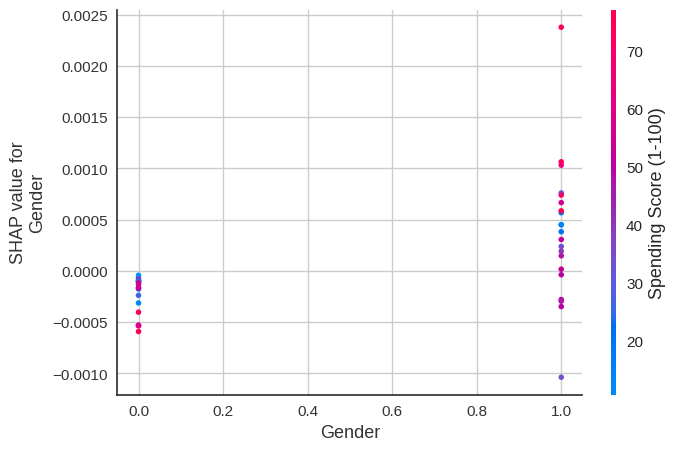

Dependence plot for feature:Age in class:5


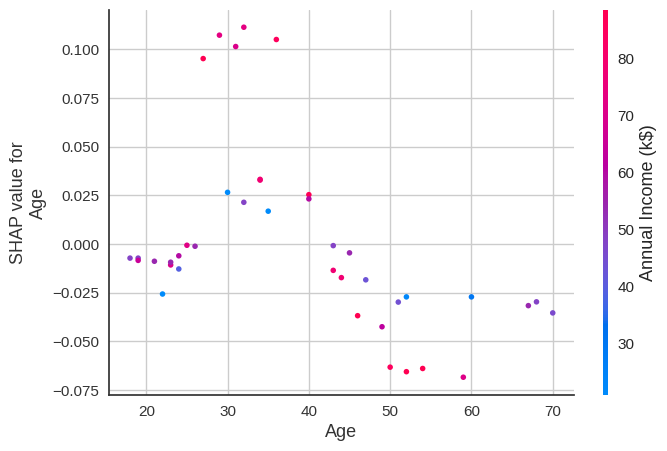

Dependence plot for feature:Annual Income (k$) in class:5


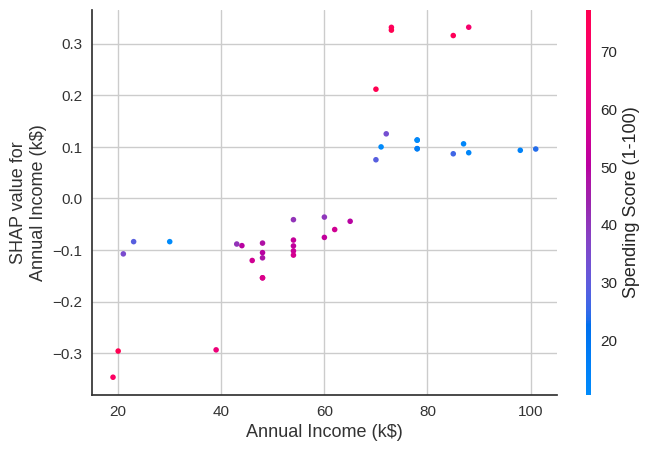

Dependence plot for feature:Spending Score (1-100) in class:5


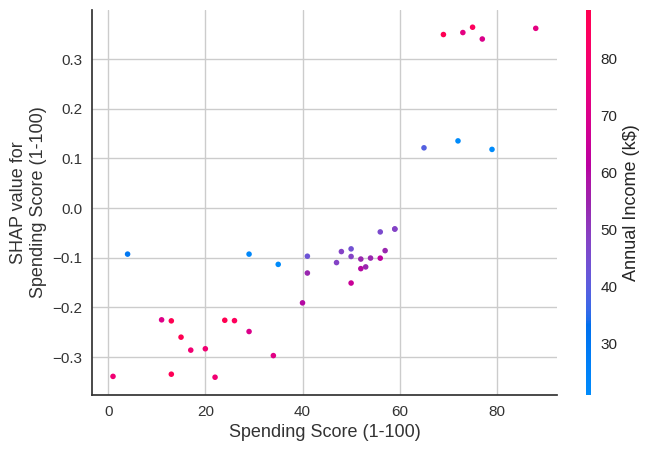

In [67]:
import shap
import matplotlib.pyplot as plt

# Define the list of feature names
feature_names = X_test.columns  # Or list of feature names if you have them

# Loop through each class
for class_index in range(y_train.nunique()):  # Assuming there are 6 classes, adjust as needed
    # Extract SHAP values for the specified class
    shap_values_class = shap_values[:, :, class_index]  # Shape: (n_samples, n_features)

    # Loop through each feature
    for feature_name in feature_names:
        # Create the dependence plot for the current feature and class
        print(f'Dependence plot for feature:{feature_name} in class:{class_index}')
        shap.dependence_plot(feature_name, shap_values_class, X_test)

- From the above dependence plot we can clearly see how each features affect the shap values of each classes

# **Local interpretation**

In [68]:
sample_index = 0  # Example index of the sample you want to visualize
class_index = 0   # Example index of the class you want to visualize


In [69]:
shap_values_class = shap_values[sample_index, :, class_index]  # Shape: (n_features,)


In [70]:
base_value_class = explainer.expected_value[class_index]

# Force plot for local interpretation for selected sample and class

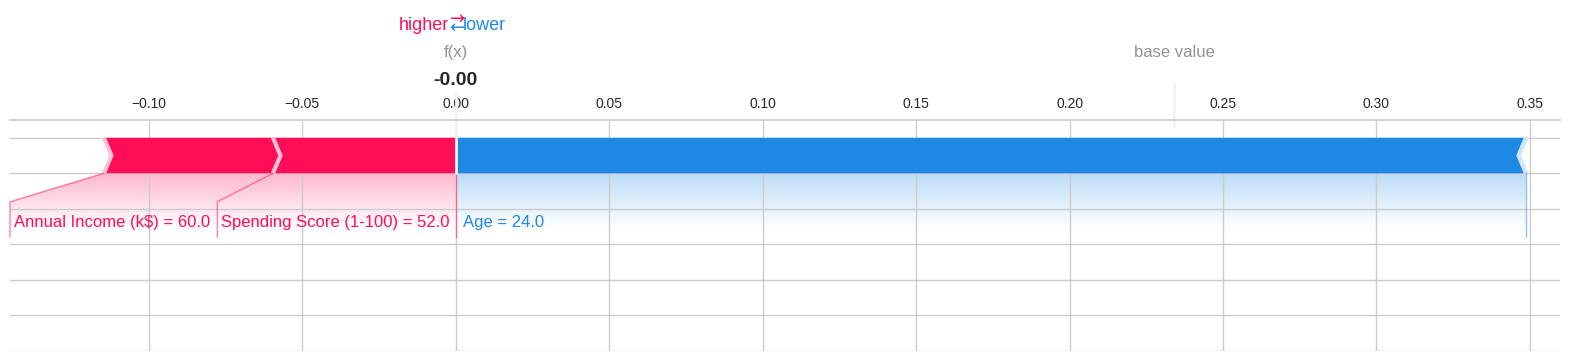

In [71]:
shap.force_plot(base_value_class, shap_values_class, X_test.iloc[sample_index],matplotlib=True)


- We can see that age = 24 has largely contributed to this particular sample to be not part of class 0 because class 0 is "Older Moderate Income Balanced Spender". Therefore age = 24 will not let this prediction be of class 0 and is clearly visible in the force plot and base value

# Let us try force plot for class_index =2

In [72]:
sample_index = 0  # Example index of the sample you want to visualize
class_index = 2   # Example index of the class you want to visualize


In [73]:
shap_values_class = shap_values[sample_index, :, class_index]  # Shape: (n_features,)


In [74]:
base_value_class = explainer.expected_value[class_index]

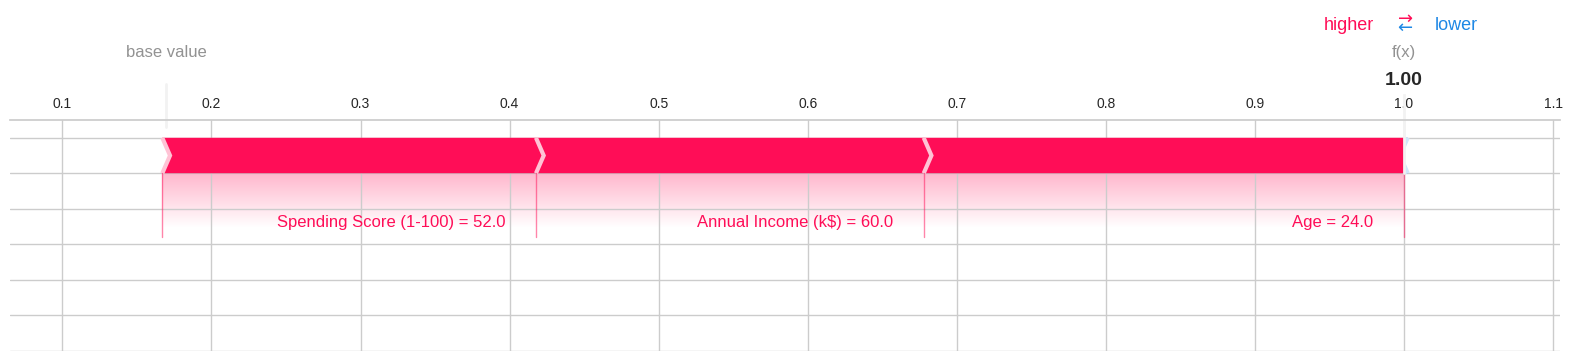

In [75]:
shap.force_plot(base_value_class, shap_values_class, X_test.iloc[sample_index],matplotlib=True)


- class 2 is  "Young Moderate Income Balanced Spender". This is clear from the above force plot that all the age, spending socre and annual income has clearly had a positive impact to predict this as class 2.
- This also helps us reassure the clustering worked in a good way.

# Decision plot for selected sample and class

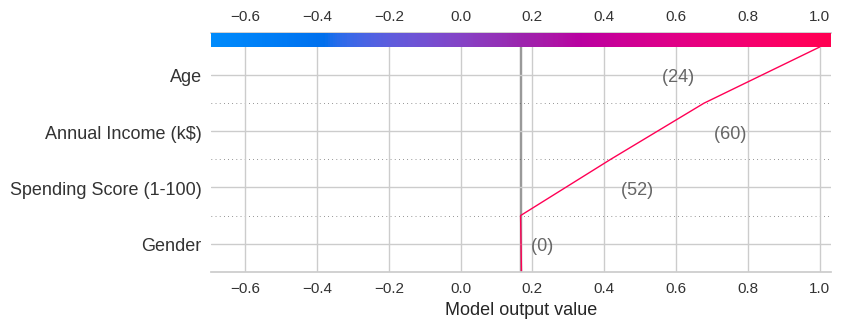

In [76]:
shap.decision_plot(base_value_class, shap_values_class, X_test.iloc[sample_index])

# **FINAL CLUSTERING MODEL**
-  best_model_from_grid_search is the best clustering model as we can see from the global and local interpretation from shap and lime

In [77]:
best_model_from_grid_search

KMeans(init='random', max_iter=100, n_clusters=6, n_init=15)

# Saving model using pickle

In [78]:
import pickle
import os

# Create the directory if it doesn't exist
model_directory = './model'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Define the file name with proper naming and versioning (e.g., 'model_v1.pkl')
model_file_path = os.path.join(model_directory, 'best_model_v1.pkl')

# Save the model using pickle
with open(model_file_path, 'wb') as file:
    pickle.dump(best_model_from_grid_search, file)

print(f"Model saved to {model_file_path}")


Model saved to ./model/best_model_v1.pkl


- Model has been saved for future use

# **Write-up or Conclusion**

1. *Global interpretation*
# **Understanding of shap summary and comparison of both approaches**

- We can see for different classes how high and low values of a feature can impact the shap value and model impact on target
- **'Cluster 0': "Older Moderate Income Balanced Spender"**

  **'Cluster 1': "Young Low Income High Spender"**
    
    **'Cluster 2': "Young Moderate Income Balanced Spender"**

    **'Cluster 3': "Middle-aged High Income Low Spender"**

    **'Cluster 4': "Middle-aged Low Income Low Spender"**

    **'Cluster 5': "Young High Income High Spender"**


## **Understanding from summary plot**    
- **Plot for class 0:** we can see if age is high , income and spending score is medium will predict class 0. If age is low it will result in not class 0.

- **Plot for class 1:** If spending score is high , annual income is low, age is low , will predict class 1. If spending score is low, annual income is high, age is high , it will result in not class 1.

- **Plot for class 2:** If age is low , annual income and spending score is medium will result to predict class 2.If age is high will result in not class 2.
- **Plot for class 3:** If annual income is high, spending score is low, age is medium, will predict class 3. If annual income is low, spending score is high will result in not class 3.

- **Plot for class 4:** If annual income is low , spending score is low and age is medium, will predict class 4. If annual income is high and spending score is high will result in not class 4.

- **Plot for class 5:** Spending score is high, annual income is high and age is low, will predict class 5. If spending score is low annual income is low and age is high will predict not class 5.

## **By Comparing the understanding of the summary plot using shap and the actual clusters, We can see the Clustering algorithm has done a good job in clustering the Dataset**

2. *Local Interpretation*
- The understanding of local interpretation for each instances are mentioned below the corresponding plots.



